In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA

In [12]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=1)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    print(f"Sequential Model Loss: {loss}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

In [2]:
df = pd.read_csv("bank.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [6]:
df["country"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df.drop("customer_id", axis=1, inplace=True)

In [8]:
df["gender"] = df["gender"].apply(lambda x: 1 if x == "Male" else 0)
df["country"] = df["country"].apply(lambda x: 0 if x == "France" else 1 if x == "Germany" else 2)

In [9]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py

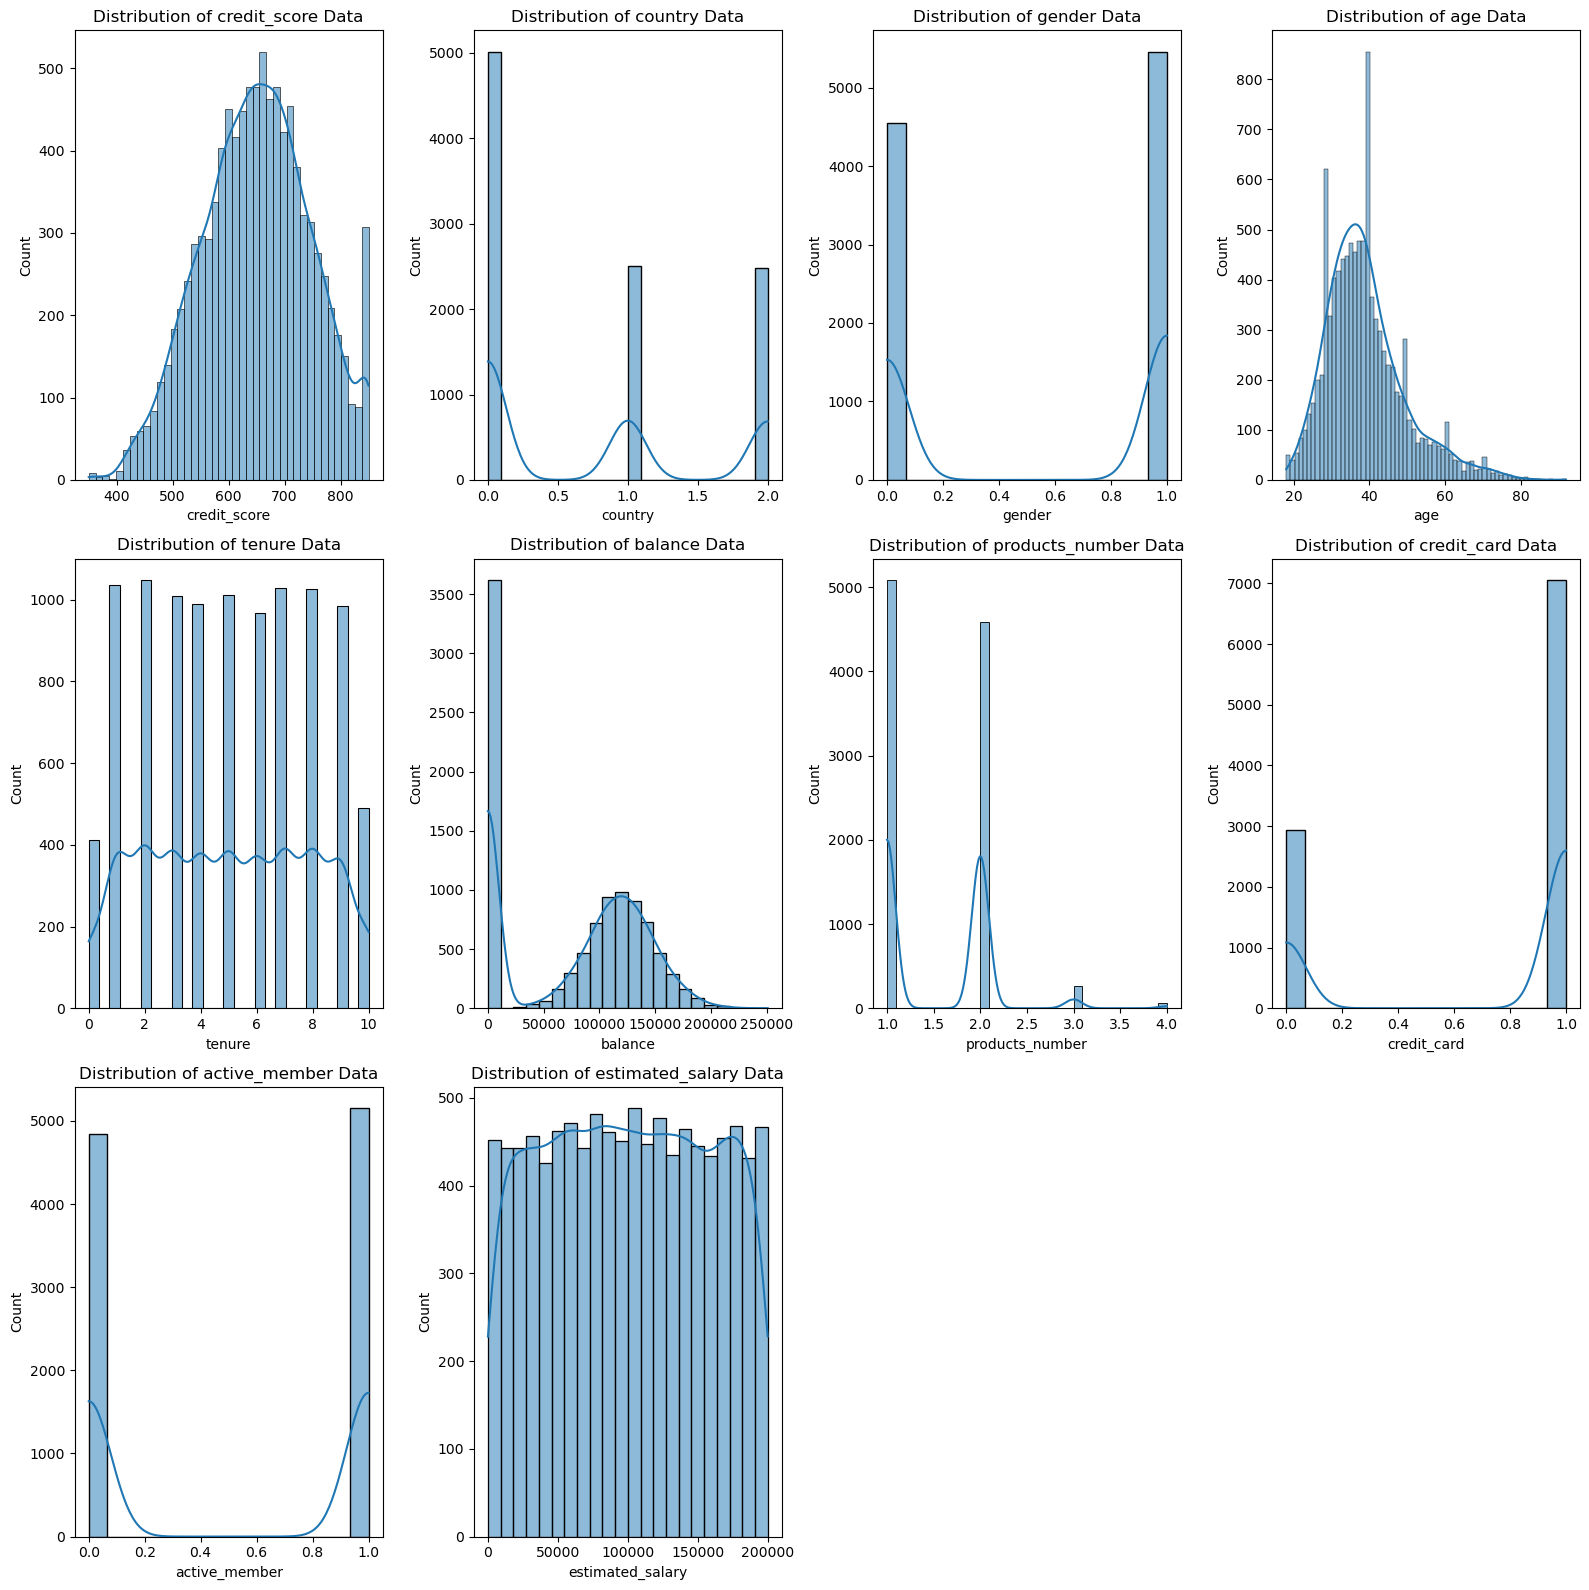

In [10]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

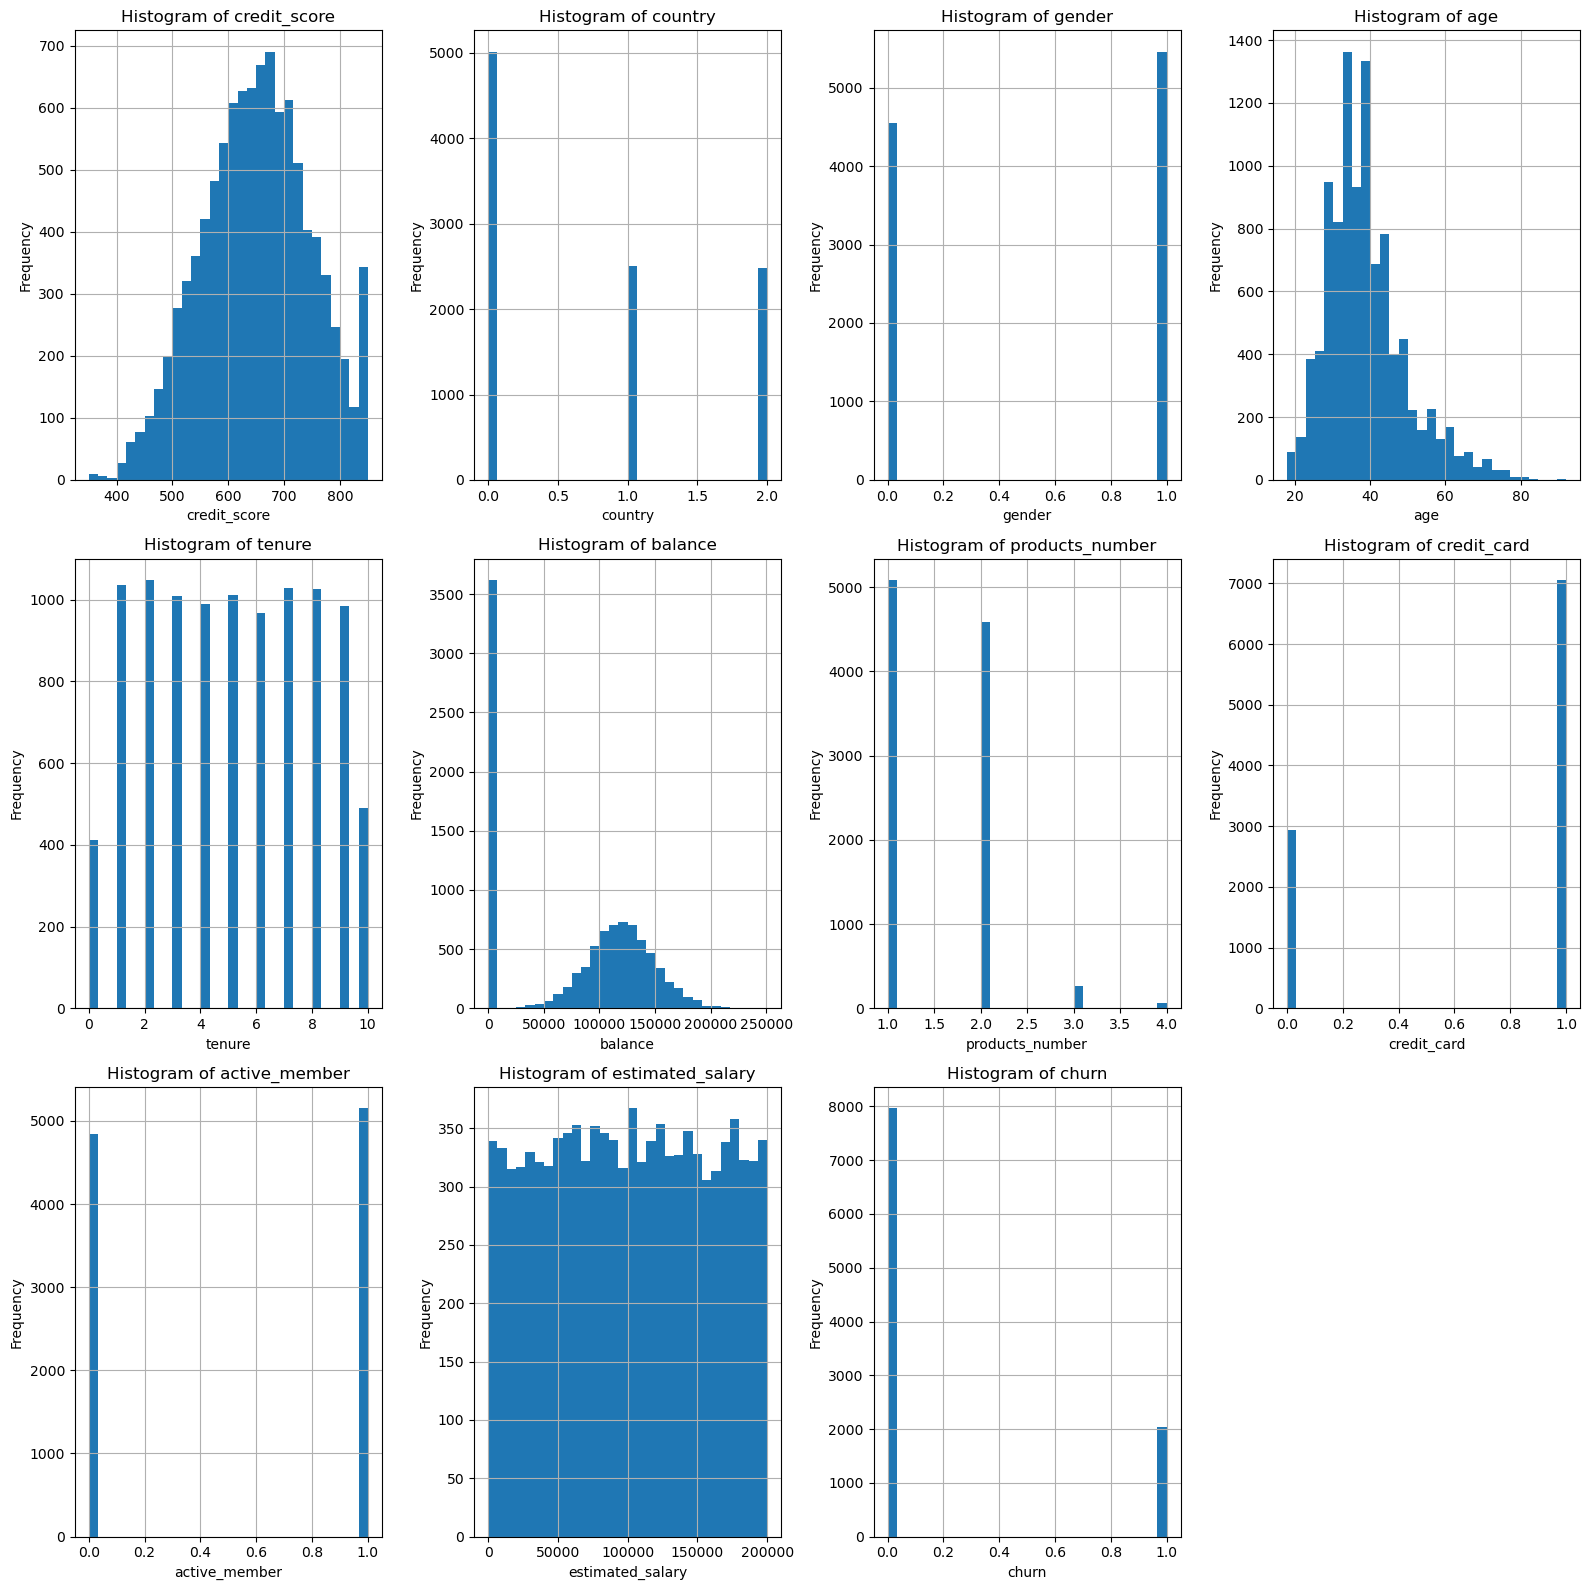

In [11]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns)  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up


for i, column in enumerate(df.columns):
    plt.subplot(rows, 4, i+1)
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.plot()

In [13]:
X, y = df.drop("churn", axis=1), df["churn"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.815
SVC Accuracy: 0.8575
DecisionTreeClassifier Accuracy: 0.781
RandomForestClassifier Accuracy: 0.864
KNeighborsClassifier Accuracy: 0.8355
GradientBoostingClassifier Accuracy: 0.8655
GaussianNB Accuracy: 0.8285
Epoch 1/50
800/800 [==============================] - 1s 461us/step - loss: 0.4199 - accuracy: 0.8206
Epoch 2/50
800/800 [==============================] - 0s 447us/step - loss: 0.3627 - accuracy: 0.8522
Epoch 3/50
800/800 [==============================] - 0s 449us/step - loss: 0.3528 - accuracy: 0.8553
Epoch 4/50
800/800 [==============================] - 0s 444us/step - loss: 0.3450 - accuracy: 0.8576
Epoch 5/50
800/800 [==============================] - 0s 450us/step - loss: 0.3414 - accuracy: 0.8575
Epoch 6/50
800/800 [==============================] - 0s 516us/step - loss: 0.3374 - accuracy: 0.8576
Epoch 7/50
800/800 [==============================] - 0s 464us/step - loss: 0.3324 - accuracy: 0.8616
Epoch 8/50
800/800 [======================

,Model,Accuracy
0,LogisticRegression,0.8150
1,SVC,0.8575
2,DecisionTreeClassifier,0.7810
3,RandomForestClassifier,0.8640
4,KNeighborsClassifier,0.8355
5,GradientBoostingClassifier,0.8655
6,GaussianNB,0.8285
7,Sequential,0.8500


In [14]:
X, y = df.drop("churn", axis=1), df["churn"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.816
SVC Accuracy: 0.853
DecisionTreeClassifier Accuracy: 0.7805
RandomForestClassifier Accuracy: 0.864
KNeighborsClassifier Accuracy: 0.824
GradientBoostingClassifier Accuracy: 0.8655
GaussianNB Accuracy: 0.8285
Epoch 1/50
800/800 [==============================] - 1s 528us/step - loss: 0.4728 - accuracy: 0.7964
Epoch 2/50
800/800 [==============================] - 1s 2ms/step - loss: 0.4307 - accuracy: 0.8184
Epoch 3/50
800/800 [==============================] - 1s 1ms/step - loss: 0.3997 - accuracy: 0.8322
Epoch 4/50
800/800 [==============================] - 0s 460us/step - loss: 0.3722 - accuracy: 0.8487
Epoch 5/50
800/800 [==============================] - 0s 457us/step - loss: 0.3638 - accuracy: 0.8497
Epoch 6/50
800/800 [==============================] - 0s 455us/step - loss: 0.3569 - accuracy: 0.8528
Epoch 7/50
800/800 [==============================] - 0s 493us/step - loss: 0.3547 - accuracy: 0.8551
Epoch 8/50
800/800 [===========================

,Model,Accuracy
0,LogisticRegression,0.8160
1,SVC,0.8530
2,DecisionTreeClassifier,0.7805
3,RandomForestClassifier,0.8640
4,KNeighborsClassifier,0.8240
5,GradientBoostingClassifier,0.8655
6,GaussianNB,0.8285
7,Sequential,0.8565


In [20]:
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and applying StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and applying PCA
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Running models with PCA-transformed data
models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.8045
SVC Accuracy: 0.8075
DecisionTreeClassifier Accuracy: 0.7175
RandomForestClassifier Accuracy: 0.8015
KNeighborsClassifier Accuracy: 0.776
GradientBoostingClassifier Accuracy: 0.8075
GaussianNB Accuracy: 0.804
Epoch 1/50
800/800 [==============================] - 1s 456us/step - loss: 0.4912 - accuracy: 0.7941
Epoch 2/50
800/800 [==============================] - 0s 438us/step - loss: 0.4800 - accuracy: 0.7958
Epoch 3/50
800/800 [==============================] - 1s 834us/step - loss: 0.4764 - accuracy: 0.7964
Epoch 4/50
800/800 [==============================] - 0s 567us/step - loss: 0.4725 - accuracy: 0.7960
Epoch 5/50
800/800 [==============================] - 0s 427us/step - loss: 0.4691 - accuracy: 0.7977
Epoch 6/50
800/800 [==============================] - 0s 423us/step - loss: 0.4650 - accuracy: 0.7993
Epoch 7/50
800/800 [==============================] - 0s 566us/step - loss: 0.4602 - accuracy: 0.8012
Epoch 8/50
800/800 [=====================

,Model,Accuracy
0,LogisticRegression,0.8045
1,SVC,0.8075
2,DecisionTreeClassifier,0.7175
3,RandomForestClassifier,0.8015
4,KNeighborsClassifier,0.7760
5,GradientBoostingClassifier,0.8075
6,GaussianNB,0.8040
7,Sequential,0.8065
